## Vehicle Detection Project

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.


## Import all the necessary Library

In [1]:
import cv2
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt

# sklearn
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

from ipywidgets import interact, interactive, fixed
from moviepy.editor import VideoFileClip
from IPython.display import HTML

%matplotlib inline

## Load & Display Test Image

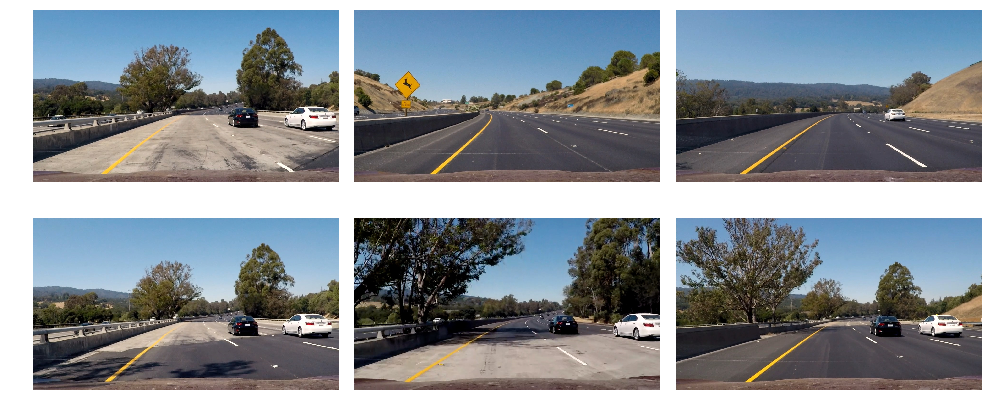

In [4]:
# Make a list of calibration images
testImages = []
images = glob.glob('./test_images/test*.jpg')

fig, axs = plt.subplots(2,3, figsize=(17, 7))
fig.subplots_adjust(hspace = .2, wspace=.05)
axs = axs.ravel()

for i, fname in enumerate(images):
    image = cv2.imread(fname)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    testImages.append(image)
    axs[i].axis('off')
    axs[i].imshow(image)


In [51]:
def load_image(path):
    
    images = []
    files = []
    
    for fileName in glob.glob(path+'/*png'):
        image = cv2.imread(fileName)
        images.append(image)
        files.append(fileName)
        
    return np.array(images) #, np.array(files)

In [62]:
def load_classify_image():
    
    root = './classify_images/'
    nonVehicles = ['Extras', 'GTI']
    vehicles = ['GTI_Far', 'GTI_Left', 'GTI_MiddleClose', 'GTI_Right', 'KITTI_extracted']
    non_vehicle_images = []
    vehicle_images = []    
         
    non_vehicle_images = np.concatenate([load_image(root + 'non-vehicles/' + path)
                                                    for path in nonVehicles ], axis=0)
            
    vehicle_images =np.concatenate([load_image(root + 'vehicles/' + path)
                                                    for path in vehicles ], axis=0)  

    return vehicle_images, non_vehicle_images    

In [64]:
vehicle_images, nonVehicle_images = load_classify_image()

print("Vehicle Image Sample Read:         ", len(vehicle_images))
print("Non Vehicle Image Sample Read:  ", len(nonVehicle_images))

5068
3900
834
909
419
664
5966
Vehicle Image Sample Read: 8792
Non Vehicle Image Sample Read: 8968


In [77]:
def printImage(row, colum, images, title):

    fig, axs = plt.subplots(row, colum, figsize=(17, 7))
    fig.suptitle(title, fontsize=16)
    fig.subplots_adjust(hspace = .2, wspace=.05)
    axs = axs.ravel()

    for i in range(10):
        axs[i].axis('off')
        axs[i].imshow(images[i])

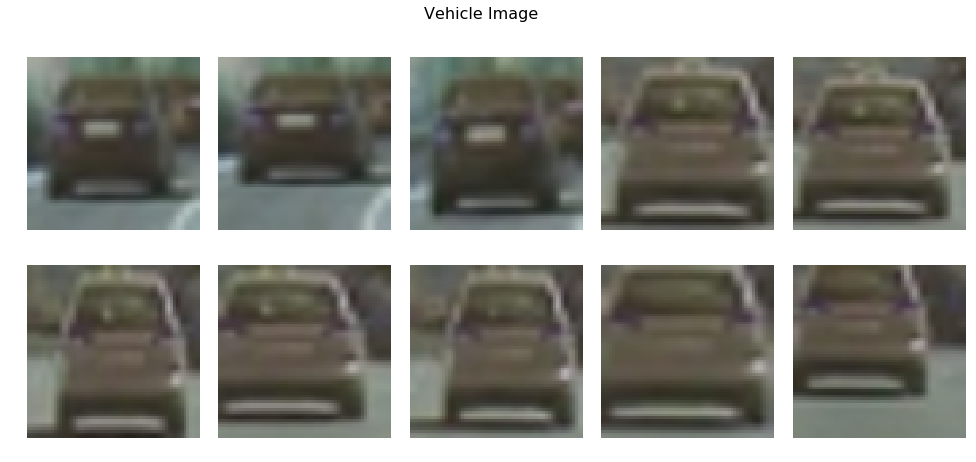

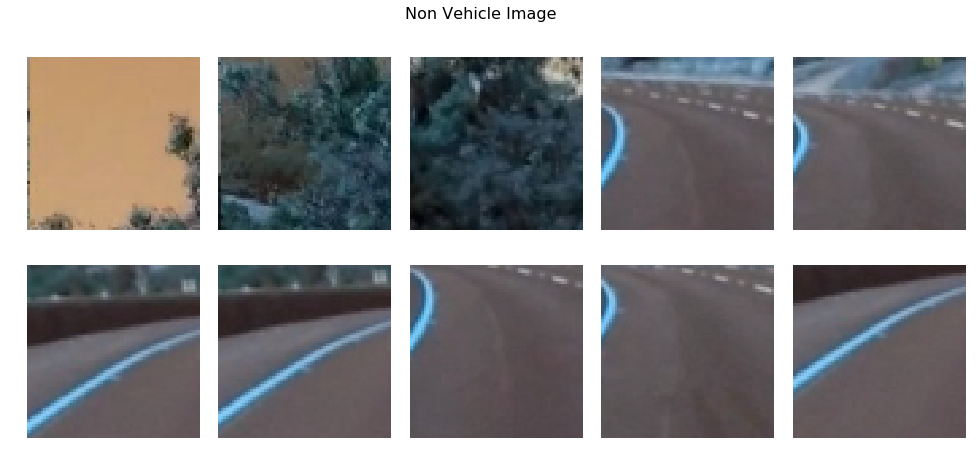

In [78]:
printImage(2, 5, vehicle_images, 'Vehicle Image')
printImage(2, 5, nonVehicle_images, 'Non Vehicle Image')

## Load Test Video

In [8]:
def load_test_video(file_name):
    vimages = []
    vframes = []
    count = 0
    clip = VideoFileClip(file_name)
    
    for image in clip.iter_frames(progress_bar=True):
        
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        vimages.append(image)
        vframes.append("%s - %d" % (file_name, count))
        count += 1

    return vimages, vframes

In [9]:
pimages, pframes = load_test_video(file_name='project_video.mp4')

100%|████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [00:11<00:00, 113.75it/s]


# feature extraction
* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector.
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.

In [ ]:
from skimage.feature import hog

orient = 9
pix_per_cell = 8
cell_per_block = 2

feature_array = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), 
                    cells_per_block=(cell_per_block, cell_per_block), visualise=False, feature_vector=False)